following tutorial https://www.youtube.com/watch?v=AACPaoDsd50&t=328s

In [206]:
#!pip install scikit-image

In [1]:
#!pip install tensorflow
import tensorflow as tf

/srv/app/venv/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import pandas as pd

In [3]:
from tensorflow import keras

In [4]:
import numpy as np
import imageio
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
#from skimage import io
import cv2
import os
import skimage as sk

ImportError: cannot import name '_validate_lengths'

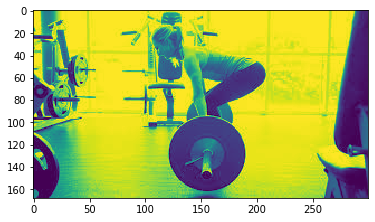

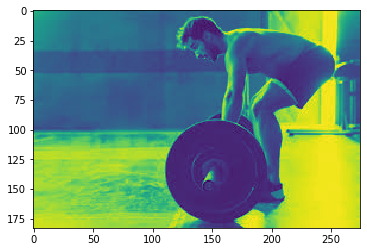

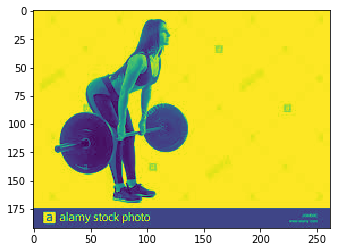

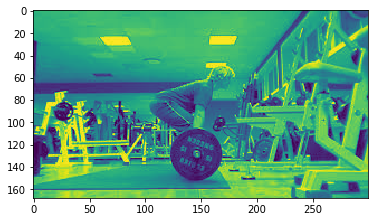

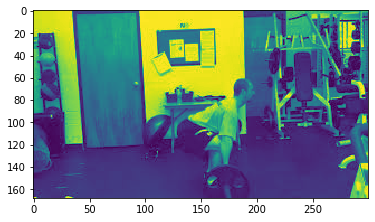

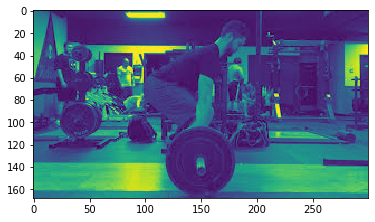

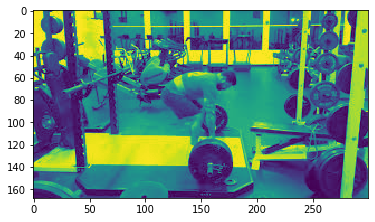

In [5]:
DirectoryGoodLift = './GoodDeadlift'
DirectoryBadLift = './BadDeadlift'

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


GoodDead = []
BadDead = []
for filename in os.listdir(DirectoryGoodLift):
    #print(filename)
    pic = rgb2gray(imageio.imread(DirectoryGoodLift+"/"+filename))
    #pic = pic.reshape(125, 125)
    GoodDead += [pic]
    plt.imshow(pic)
    plt.show()


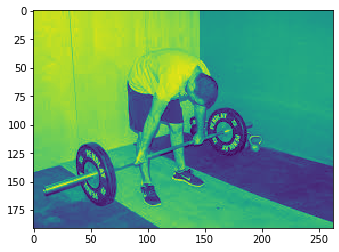

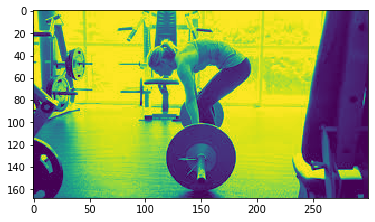

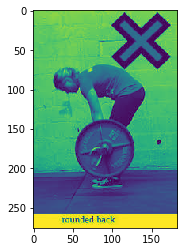

In [6]:
for filename in os.listdir(DirectoryBadLift):
    #print(filename)
    pic = rgb2gray(imageio.imread(DirectoryBadLift+"/"+filename))
    #pic = imageio.imread_greyscale(pic)
    #print(pic.shape)
    #size = (175, 175)
    #resized = ImageOps.fit(pic, size, Image.ANTIALIAS)
    BadDead += [pic]
    plt.imshow(pic)
    plt.show()
#BadDead = cv2.imread(DirectoryBadLift+"/"+filename, cv2.IMREAD_GREYSCALE)

load data, get train and test

In [7]:
class_names = ['Midfoot', 'Shoulder Width', 'Knees Touch', 'Straight Back']

right now we don't have a lot of data. Gonna try and build a model anyway. 1 is proper, 0 is improper

each image should be a x by x array, shape of training data should be (len, x, x)

In [8]:
train_data_images = GoodDead+BadDead
train_data_labels = [1]*7 +[0]*3
train_df = pd.DataFrame({'Image':train_data_images, 'Proper':train_data_labels})
#reminder not to print the df, it's a bitch on the kernel

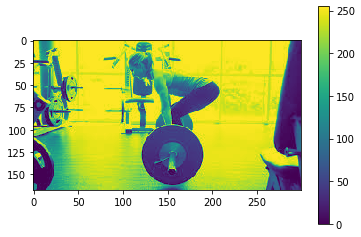

In [9]:
plt.figure()
plt.imshow(train_df['Image'][0])
plt.colorbar()
plt.grid(False)
plt.show()

each image must be scaled

In [10]:
train_df['Image'] = train_df['Image']/255 #normalize(train_df['Image'])? the tutorial used 255 but idk why. 
#I don't think we need to bc it's black and white
#plt.imshow(train_df['Image'][0])
a = train_df['Image'][0].shape
a

(168, 300)

images display

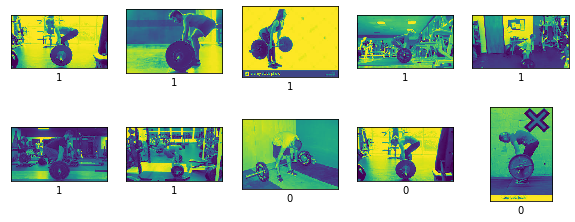

In [11]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_df['Image'][i])
    plt.xlabel(train_df['Proper'][i])

set up the layers

In [20]:
# checking dimensions of train_df elements
# nn doesn't like the images to be of different dimesnions so we either have to filter out or modify
for el in train_df['Image']:
    a = el.shape
    print(a)
ti = train_df[[True, False, False, True, True, True, True, False, True, False]]
ti

(168, 300)
(183, 275)
(192, 262)
(168, 300)
(168, 300)
(168, 300)
(168, 300)
(191, 263)
(168, 300)
(276, 183)


,Image,Proper
0,"[[0.9959788235294117, 0.9998999999999999, 0.99...",1
3,"[[0.6617564705882354, 0.6617564705882354, 0.66...",1
4,"[[0.9298992156862744, 0.9298992156862744, 0.93...",1
5,"[[0.3792796078431372, 0.3760168627450981, 0.36...",1
6,"[[0.9791823529411763, 0.9883901960784313, 0.99...",1
8,"[[0.9881364705882353, 0.9998999999999999, 0.99...",0


In [13]:
np.array(ti['Image'][0].tolist()).shape
#looks good

(168, 300)

In [21]:
# getting in proper format for nn
train_x = np.array([el.tolist() for el in ti['Image']])
train_y = np.array([el for el in ti['Proper']])
train_x.shape

(6, 168, 300)

In [15]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(168, 300)), 
                          keras.layers.Dense(100, activation=tf.nn.relu), 
                          keras.layers.Dense(4, activation=tf.nn.softmax)])

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(train_x, train_y, epochs=5) #

Train on 6 samples
Epoch 1/5
6/6 [==============================] - 1s 84ms/sample - loss: 0.8433 - accuracy: 0.8333
Epoch 2/5
6/6 [==============================] - 0s 6ms/sample - loss: 35.1347 - accuracy: 0.8333
Epoch 3/5
6/6 [==============================] - 0s 5ms/sample - loss: 17.9797 - accuracy: 0.8333
Epoch 4/5
6/6 [==============================] - 0s 2ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
6/6 [==============================] - 0s 5ms/sample - loss: 4.2771 - accuracy: 0.8333


NOTE: we have basically no data so far. We should find more to train before assessing the test set performance

In [19]:
#test_loss, test_acc = model.evaluate(test_x, test_x)

In [ ]:
preds = model.predict(test_images)

In [41]:
def normalize(x):
    return (x-np.min(x))/(x-np.max(x))

In [16]:
def one_hot_encode(x):
    encoded = np.zeros(len(x), 4)
    for idx, val in enumerate(x):
        encoded[idx][val] = 1
    return encoded

preprocess and save data